<a href="https://colab.research.google.com/github/celineans/celineans/blob/main/Data_Viz_JV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

# import du dataset
df = pd.read_csv('/content/drive/MyDrive/Projet Games Céline/vgsales_all.csv')

# supression des colonnes inutiles
df = df.drop(["Rank"], axis=1)

# Processing des NaN
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)
df  = (df[(df['Year'] < 2022) ])
df = df.dropna(subset=['Global_Sales'])
df = df.dropna(subset=['Critic_Score']) #pas dans le script de Dorian 
# analyse des NaN restants
df.isna().sum(axis=0)
# remplacer les NaN par O pour éviter la création d'array lors du pivot
df['NA_Sales'] = df['NA_Sales'].fillna(0)
df['PAL_Sales'] = df['PAL_Sales'].fillna(0)
df['JP_Sales'] = df['JP_Sales'].fillna(0)
df['Other_Sales'] = df['Other_Sales'].fillna(0)

# renommer pour plus de compréhension
df = df.rename(columns={'Developer' : 'Studio'})
df = df.rename(columns={'PAL_Sales' : 'EU_Sales'})
#reformatage pour effacer les espaces
df['Publisher'] = df['Publisher'].str.strip()
df['Studio'] = df['Studio'].str.strip()

#supression des doublons
df = df.drop_duplicates(keep = 'first')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# après une analyse de la répartition des valeurs, on enlève les variables extreme (minoritaire)
df = df.drop(df[(df['Year'] == '1989')| 
                (df['Year'] == '1987')| 
                (df['Year'] == '1985')| 
                (df['Year'] == '2020')|
                (df['Year'] == '2019')|
                (df['Year'] == '1990')|
                (df['Year'] == '1992')|
                (df['Year'] == '1994')|
                (df['Year'] == '1991')|
                (df['Year'] == '1993')].index)

df = df.drop(df[(df['Genre'] == 'Visual Novel')|
                (df['Genre'] == 'Board Game')| 
                (df['Genre'] == 'Sandbox')|
                (df['Genre'] == 'MMO')| 
                (df['Genre'] == 'Education')].index)

df = df.drop(df[(df['Platform'] == 'GEN')|
                (df['Platform'] == 'VC')|
                (df['Platform'] == 'XBL')|
                (df['Platform'] == 'PSN')|
                (df['Platform'] == 'NES')|
                (df['Platform'] == 'GBC')|
                (df['Platform'] == 'PSV')|
                (df['Platform'] == 'SAT')|
                (df['Platform'] == 'GB')|
                (df['Platform'] == 'SNES')].index)

In [ ]:
# Split de la colonne Platform par plateforme afin de pouvoir réaliser un pivot par la suite qui nous permettra d'avoir une ligne par jeu
df = pd.get_dummies(data=df, columns=['Platform'])
df = df.fillna(0)

In [ ]:
# Modification du DataFrame pour avoir une ligne par jeu
df =df.pivot_table(index='Name',aggfunc={'Year' : lambda x: x.mode().iat[0],
                                         'Genre': lambda x: x.mode().iat[0],
                                         'Studio': lambda x: x.mode().iat[0],
                                         'Publisher' : lambda x: x.mode().iat[0],
                                         'NA_Sales':'sum',
                                         'EU_Sales':'sum',
                                         'JP_Sales':'sum',
                                         'Other_Sales':'sum',
                                         'Global_Sales':'sum',
                                         'Critic_Score':lambda x: x.mode().iat[0],
                                            'Platform_3DS':'sum',
                                            'Platform_DC':'sum',
                                            'Platform_DS':'sum',
                                            'Platform_GBA':'sum',
                                            'Platform_GC':'sum',
                                            'Platform_N64':'sum',
                                         'Platform_NS':'sum',
                                            'Platform_PC':'sum',
                                            'Platform_PS':'sum',
                                            'Platform_PS2':'sum',
                                            'Platform_PS3':'sum',
                                            'Platform_PS4':'sum',
                                            'Platform_PSP':'sum',
                                            'Platform_Wii':'sum',
                                            'Platform_WiiU':'sum',
                                            'Platform_X360':'sum',
                                            'Platform_XB':'sum',
                                            'Platform_XOne':'sum',
                                           })


# Mise en forme de colonnes pour les avoir dans un ordre plus pertinent
df = df.reindex(columns=['Name', 'Year', 'Genre', 'Publisher', 'Studio', 'Critic_Score','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Platform_3DS',
       'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC',
       'Platform_N64', 'Platform_NS', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB',
       'Platform_XOne'])

In [ ]:
# supression de Name car doublon et vide
df = df.drop(["Name"], axis=1)

In [ ]:
# Reconstituer la colonne Platform
# Remplacer les 2 par des 1 pour avoir l'équivalent de oui/non
df['Platform_3DS'] = df['Platform_3DS'].replace(['2'],[1])
df['Platform_DS'] = df['Platform_DS'].replace(['2'],[1])
df['Platform_PS2'] = df['Platform_PS2'].replace(['2'],[1])

# Fusionner les deux colonnes en une seule colonne
df['TotalPlatform'] = df[['Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_N64', 'Platform_NS', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne']].sum(axis=1)

# Extraire les colonnes générées par le get_dummies
platform_columns = [col for col in df.columns if col.startswith("Platform_")]

# Appliquer les conditions à toutes les lignes du DataFrame
df.loc[df['TotalPlatform'] > 2, 'Platform'] = 'Multi_Plateforme'
df.loc[df['TotalPlatform'] <= 2, 'Platform'] = df[platform_columns].idxmax(axis=1).str.replace("Platform_", "")

# Supprimer les colonnes générées par get_dummies
df.drop(platform_columns, axis=1, inplace=True)
df = df.drop(['TotalPlatform'],axis=1)

# Réinitialiser l'index
df.reset_index(inplace=True)

**Graphiques**

In [ ]:
from bokeh.layouts import row
from bokeh.models import Range1d, LabelSet
from bokeh.plotting import figure, output_notebook, show
from bokeh.models.widgets import Panel
from bokeh.models.widgets import Tabs
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
output_notebook()

data_NA = df.groupby(by=['Year'])['NA_Sales'].sum()
data_NA = data_NA.reset_index()

data_EU = df.groupby(by=['Year'])['EU_Sales'].sum()
data_EU = data_EU.reset_index()

data_JP = df.groupby(by=['Year'])['JP_Sales'].sum()
data_JP = data_JP.reset_index()

data_Others = df.groupby(by=['Year'])['Other_Sales'].sum()
data_Others = data_Others.reset_index()

data_globales = df.groupby(by=['Year']).sum()
data_globales = data_globales.reset_index()

p1 = figure(plot_width = 600, plot_height = 400,x_axis_label='Year', y_axis_label='Sales',y_range=[0,600]) 
p2 = figure(plot_width = 600, plot_height = 400,x_axis_label='Year', y_axis_label='Sales',y_range=[0,600]) 
p3 = figure(plot_width = 600, plot_height = 400,x_axis_label='Year', y_axis_label='Sales',y_range=[0,600]) 
p4 = figure(plot_width = 600, plot_height = 400,x_axis_label='Year', y_axis_label='Sales',y_range=[0,600]) 
p5 = figure(plot_width = 600, plot_height = 400,x_axis_label='Year', y_axis_label='Sales',y_range=[0,600]) 

source1 = ColumnDataSource(data_NA)
source2 = ColumnDataSource(data_EU)
source3 = ColumnDataSource(data_JP)
source4 = ColumnDataSource(data_Others)
source5= ColumnDataSource(data_globales)

p1.line(x = "Year",
        y = "NA_Sales",
        line_width = 3,
        color = "darkviolet",
        source = source1)

p5.line(x = "Year",
        y = "NA_Sales",
        line_width = 3,
        color = "darkviolet",
        source = source1,
       legend_label="NA_Sales")

p2.line(x = "Year",
        y = "EU_Sales",
        line_width = 3,
        color = "royalblue",
        source = source2)

p5.line(x = "Year",
        y = "EU_Sales",
        line_width = 3,
        color = "royalblue",
        source = source2,
       legend_label="EU_Sales")

p3.line(x = "Year",
       y = "JP_Sales",
       line_width = 3,
       color = "hotpink",
       source = source3)

p5.line(x = "Year",
       y = "JP_Sales",
       line_width = 3,
       color = "hotpink",
       source = source3,
       legend_label="JP_Sales")

p4.line(x = "Year",
       y = "Other_Sales",
       line_width = 3,
       color = "aqua",
       source = source4)

p5.line(x = "Year",
       y = "Other_Sales",
       line_width = 3,
       color = "aqua",
       source = source4,
       legend_label="Other_Sales")

p5.line(x = "Year",
       y='Global_Sales',
       line_width = 3,
       color = "gray",
       source = source5,
       legend_label="Global_Sales")

labels = LabelSet(x='weight', y='height', text='names',
              x_offset=5, y_offset=5, render_mode='canvas')
p5.add_layout(labels)

tab1 = Panel(child = p1,
            title = "NA_Sales")

tab2 = Panel(child = p2,
            title = "EU_Sales")

tab3 = Panel(child = p3,
            title = "JP_Sales")

tab4 = Panel(child = p4,
            title = "Others_Sales")

tab5 = Panel(child = p5,
            title = "Globales")

tabs = Tabs(tabs = [tab5, tab2, tab3, tab4, tab1])

show(tabs)
from bokeh.io import export_png
export_png(tab5, filename="plot.png")

KeyError: ignored

In [ ]:
df_areas = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_areas = df_areas.sum().reset_index()
df_areas = df_areas.rename(columns={"index": "Areas", 0: "Sales"})
df_areas

labels = df_areas['Areas']
sizes = df_areas['Sales']

colors = ['darkviolet', 'royalblue', 'hotpink', 'aqua']

import plotly.express as px
fig = px.pie(df_areas,
             values=sizes,
             names=labels,
             color_discrete_sequence=colors)
fig.show()

Top 10 Plateforme

In [ ]:
# Creation d'une série pour analyser les plateforme
df1 = df[df.columns[11:]]

In [ ]:
# Remplacer les petites valeurs par autre
df1['Platform'] = df['Platform'].replace(['WiiU', 'PS4', 'XOne',
       'XB', 'DC'],['Autre','Autre','Autre','Autre','Autre'])
# Remplacer les petites valeurs par autre aussi dans df
df['Platform'] = df['Platform'].replace(['WiiU', 'PS4', 'XOne',
       'XB', 'DC'],['Autre','Autre','Autre','Autre','Autre'])
df1 = pd.Series(df1["Platform"])
df1.str.split(',', expand=True).stack().reset_index(drop=True)

0                    PS2
1                    PS2
2                    PS2
3                    PS2
4                    PS2
              ...       
3395    Multi_Plateforme
3396                 PSP
3397                 PSP
3398                 PS3
3399                 PS3
Length: 3400, dtype: object

In [ ]:
# Dictionnaire des couleurs par modalités pour retrouver les mêmes sur l'ensemble des graphiques
DICT_PLAT = {'Multi_Plateforme': 'dodgerblue',
 'PSP': 'tomato',
 'GBA': 'mediumaquamarine',
 'PC': 'mediumpurple',
 'DS': 'sandybrown',
 'PS3': 'lightskyblue',
 'GC': 'hotpink',
 'PS': 'palegreen',
 'Wii': 'violet',
 'PS2': 'gold',
 'Autre': 'lavender',
 'X360': 'salmon',
 '3DS': 'aquamarine',
 'NS': 'plum',
 'N64': 'peachpuff'}

In [ ]:
color = ['dodgerblue','tomato','mediumaquamarine','mediumpurple','sandybrown',
                                        'lightskyblue','hotpink','palegreen','violet','gold','lavender',
                                        'salmon','aquamarine','plum','peachpuff']
import plotly.express as px
fig = px.pie(df1,
             values=df1.value_counts(),
             names=df1.value_counts().index,
             color_discrete_sequence = color)
fig.show()

Text(0.5, 1.0, 'Nombre de ventes median par plateforme')

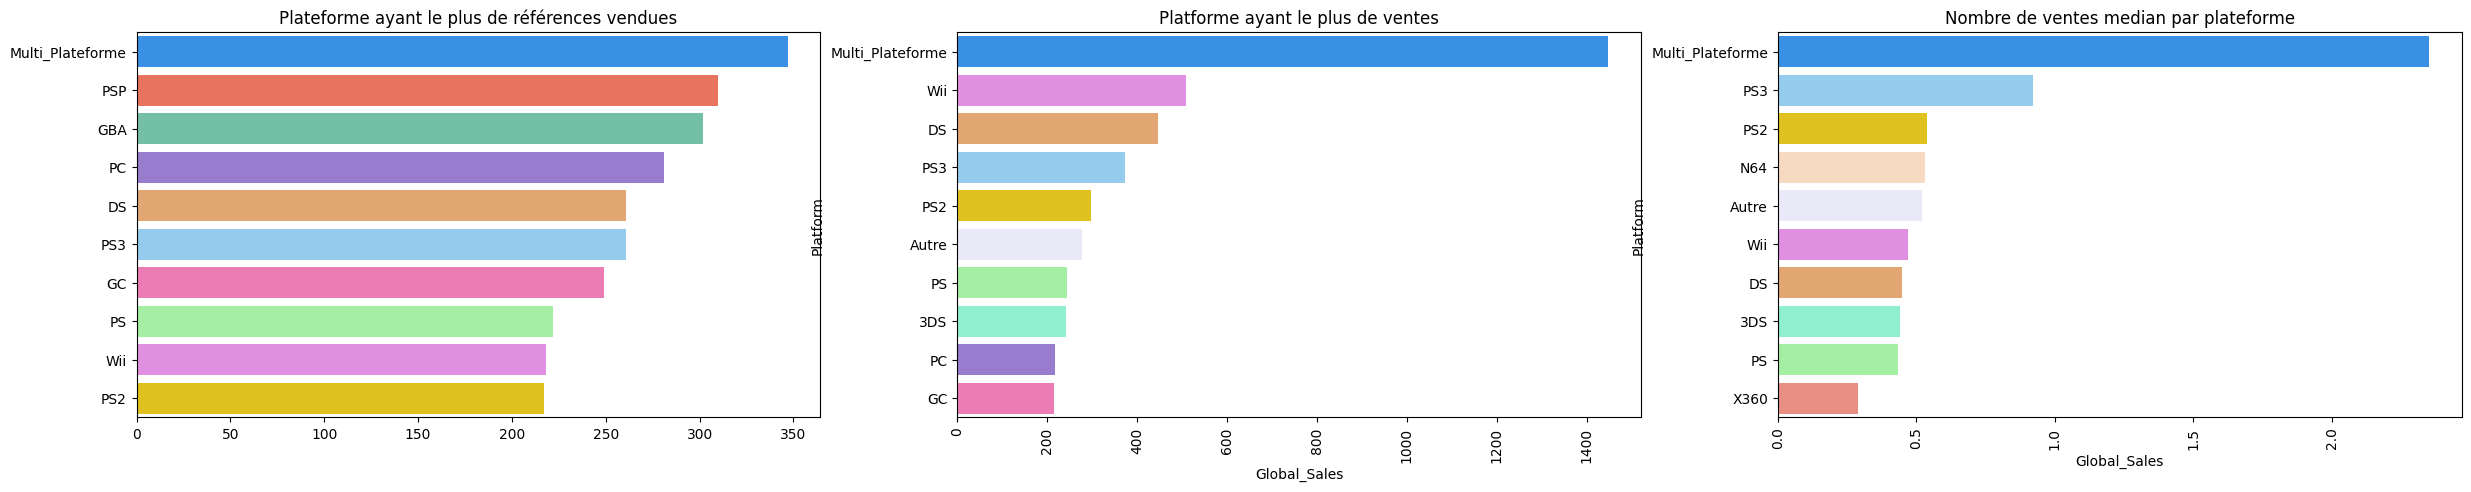

In [ ]:
plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
sns.barplot(y=df["Platform"].value_counts().head(10).index,
           x=df["Platform"].value_counts().head(10).values, palette=DICT_PLAT);
plt.title("Plateforme ayant le plus de références vendues")

plt.subplot(1, 3, 2)
df_publisher = df[['Platform', 'Global_Sales']]
df_publisher = df_publisher.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Platform", x="Global_Sales",palette=DICT_PLAT,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Platforme ayant le plus de ventes")

plt.subplot(1, 3, 3)
df_publisher = df[['Platform', 'Global_Sales']]
df_publisher = df_publisher.groupby('Platform')['Global_Sales'].median().sort_values(ascending=False).head(10)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Platform", x="Global_Sales",palette=DICT_PLAT,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Nombre de ventes median par plateforme")

Text(0.5, 1.0, 'Nombre de ventes moyen par plateforme')

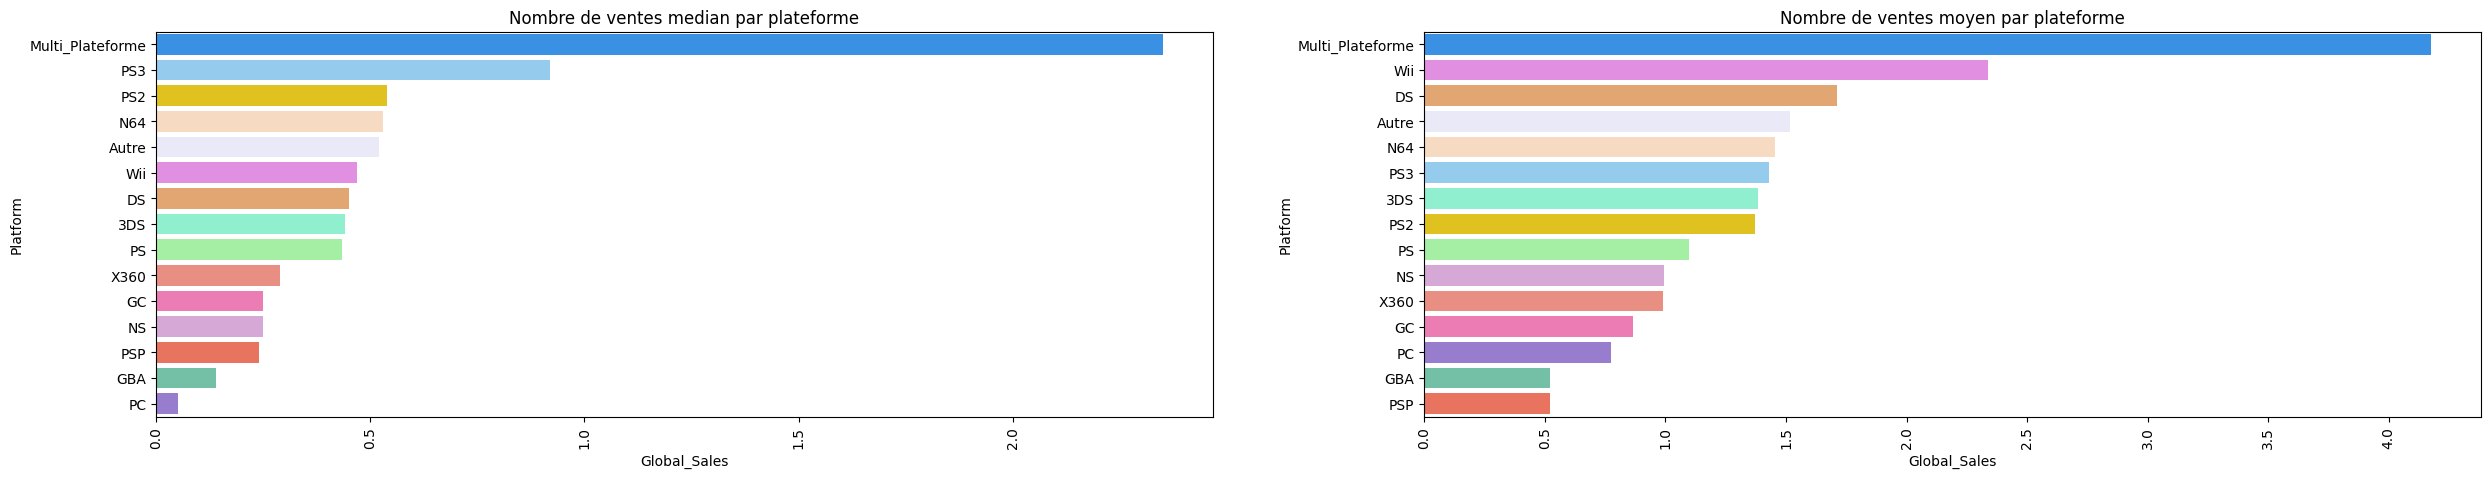

In [ ]:
plt.figure(figsize=(30, 5))

plt.subplot(1, 2, 1)
df_publisher = df[['Platform', 'Global_Sales']]
df_publisher = df_publisher.groupby('Platform')['Global_Sales'].median().sort_values(ascending=False)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Platform", x="Global_Sales",palette=DICT_PLAT,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Nombre de ventes median par plateforme")

plt.subplot(1, 2, 2)
df_publisher = df[['Platform', 'Global_Sales']]
df_publisher = df_publisher.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Platform", x="Global_Sales",palette=DICT_PLAT,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Nombre de ventes moyen par plateforme")

[Text(0, 0, 'PS2'),
 Text(1, 0, 'Autre'),
 Text(2, 0, 'PS'),
 Text(3, 0, 'Multi_Plateforme'),
 Text(4, 0, 'N64'),
 Text(5, 0, 'NS'),
 Text(6, 0, 'DS'),
 Text(7, 0, 'PC'),
 Text(8, 0, 'GC'),
 Text(9, 0, 'PS3'),
 Text(10, 0, 'PSP'),
 Text(11, 0, '3DS'),
 Text(12, 0, 'Wii'),
 Text(13, 0, 'GBA'),
 Text(14, 0, 'X360')]

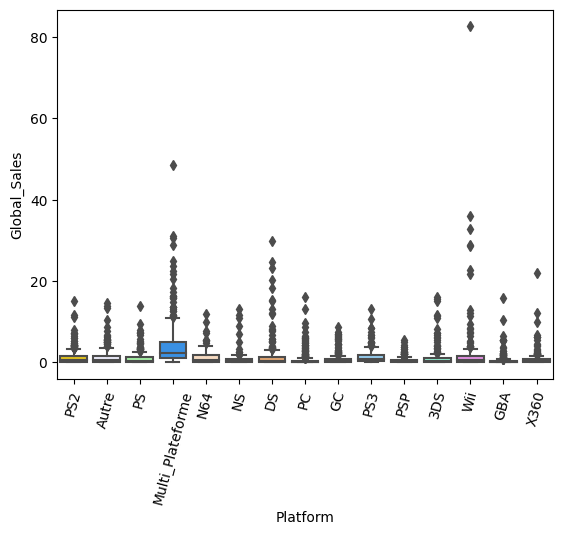

In [ ]:
ax=sns.boxplot(x='Platform',
            y='Global_Sales',
            palette = DICT_PLAT,
            data=df[df.Platform.isin(list(df.Platform.value_counts().index))])
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)

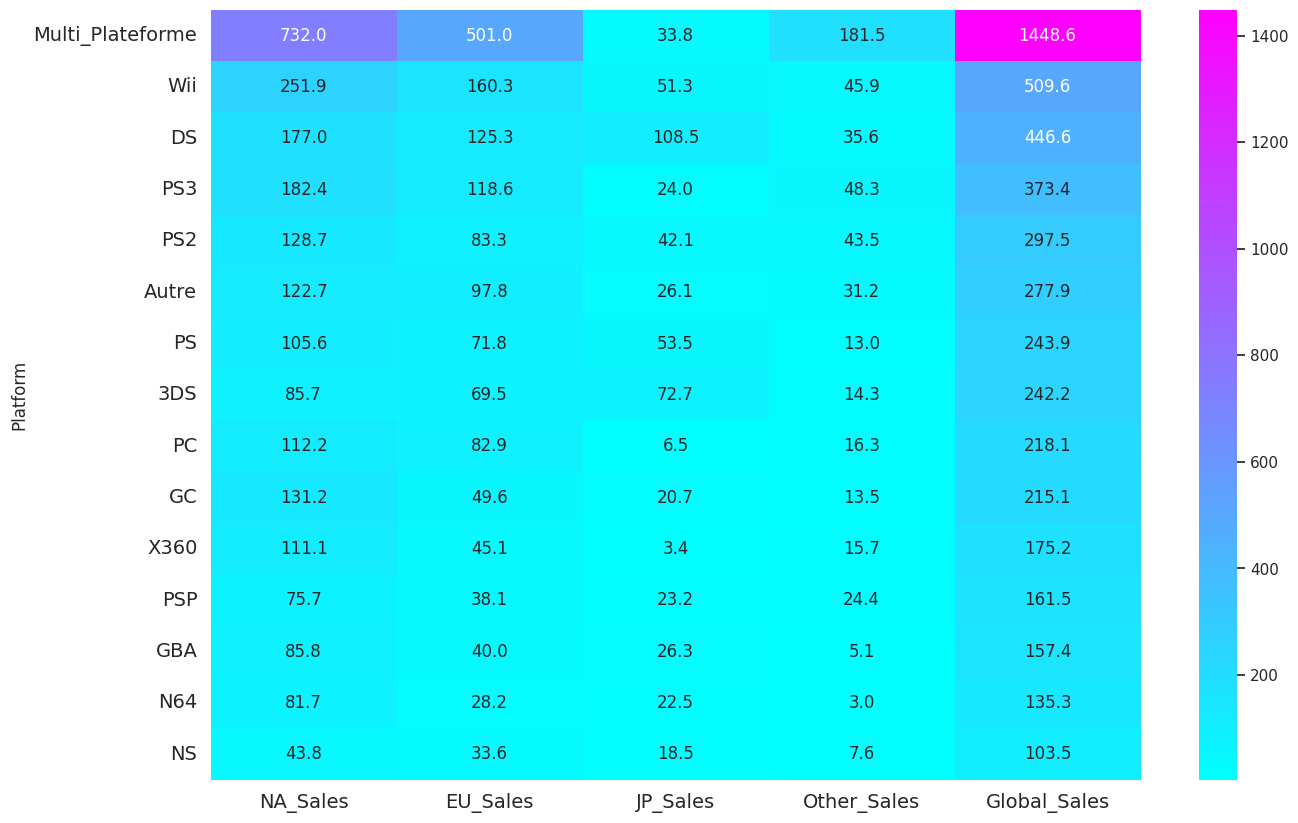

In [ ]:
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',"Global_Sales"]]
# comp_genre
comp_map = comp_platform.groupby(by=['Platform']).sum().sort_values(by="Global_Sales",ascending=False)
# comp_map

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True,cmap="cool", fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Top 10 des genres

In [ ]:
# Remplacer les modalités peu nombreuse par Autre
df['Genre'] = df['Genre'].replace(['Music', 'Party','Action-Adventure'],['Autre','Autre','Autre'])
# Créer une serie pour analyser le genre
df2 = df['Genre']
df2.str.split(',', expand=True).stack().reset_index(drop=True)

0       Role-Playing
1       Role-Playing
2       Role-Playing
3       Role-Playing
4       Role-Playing
            ...     
3395        Platform
3396          Puzzle
3397          Puzzle
3398          Action
3399          Action
Length: 3400, dtype: object

In [ ]:
color = ['dodgerblue','tomato','mediumaquamarine','mediumpurple','sandybrown',
                                        'lightskyblue','hotpink','palegreen','violet','gold','lavender',
                                        'salmon','aquamarine','plum','peachpuff']
import plotly.express as px
fig = px.pie(df2,
             values=df2.value_counts(),
             names=df2.value_counts().index,
             color_discrete_sequence = color)
fig.show()

In [ ]:
# création d'un dictionnaire pour avoir les même couleurs
DICT_GENRE = {'Role-Playing': 'dodgerblue',
 'Action': 'tomato',
 'Shooter': 'mediumaquamarine',
 'Sports': 'mediumpurple',
 'Platform': 'sandybrown',
 'Racing': 'lightskyblue',
 'Adventure': 'hotpink',
 'Fighting': 'palegreen',
 'Misc': 'violet',
 'Strategy': 'gold',
 'Simulation': 'lavender',
 'Puzzle': 'salmon',
 'Autre': 'aquamarine'}

Text(0.5, 1.0, 'Nombre de ventes median par Genre')

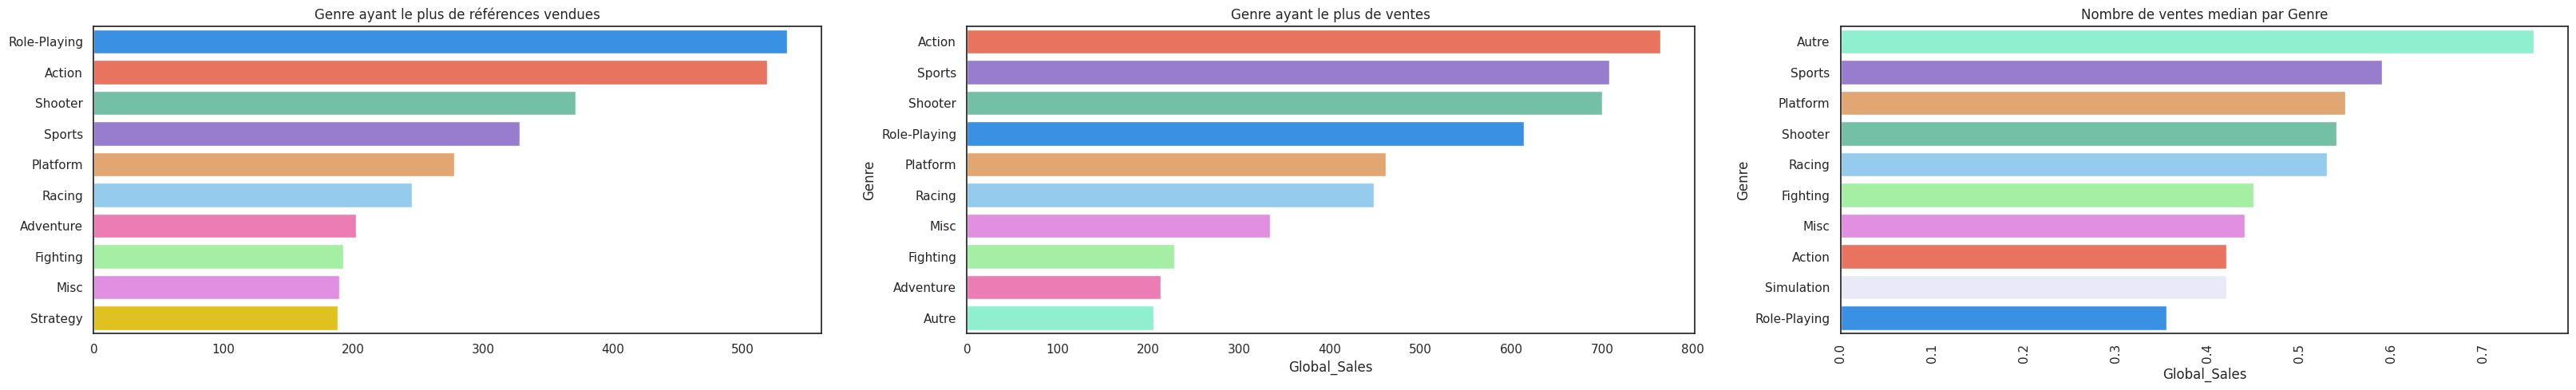

In [ ]:
sns.set_theme(style = 'white')
plt.figure(figsize=(40, 5))

plt.subplot(1, 3, 1)
sns.barplot(y=df["Genre"].value_counts().head(10).index,
           x=df["Genre"].value_counts().head(10).values, palette =DICT_GENRE );
plt.title("Genre ayant le plus de références vendues")

plt.subplot(1, 3, 2)
df_publisher = df[['Genre', 'Global_Sales']]
df_publisher = df_publisher.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Genre", x="Global_Sales",palette =DICT_GENRE,data=df_publisher);
plt.title("Genre ayant le plus de ventes")

plt.subplot(1, 3, 3)
df_publisher = df[['Genre', 'Global_Sales']]
df_publisher = df_publisher.groupby('Genre')['Global_Sales'].median().sort_values(ascending=False).head(10)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Genre", x="Global_Sales",palette =DICT_GENRE,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Nombre de ventes median par Genre")


Comparatif genres mediane et moyenne

Text(0.5, 1.0, 'Nombre de ventes moyen par Genre')

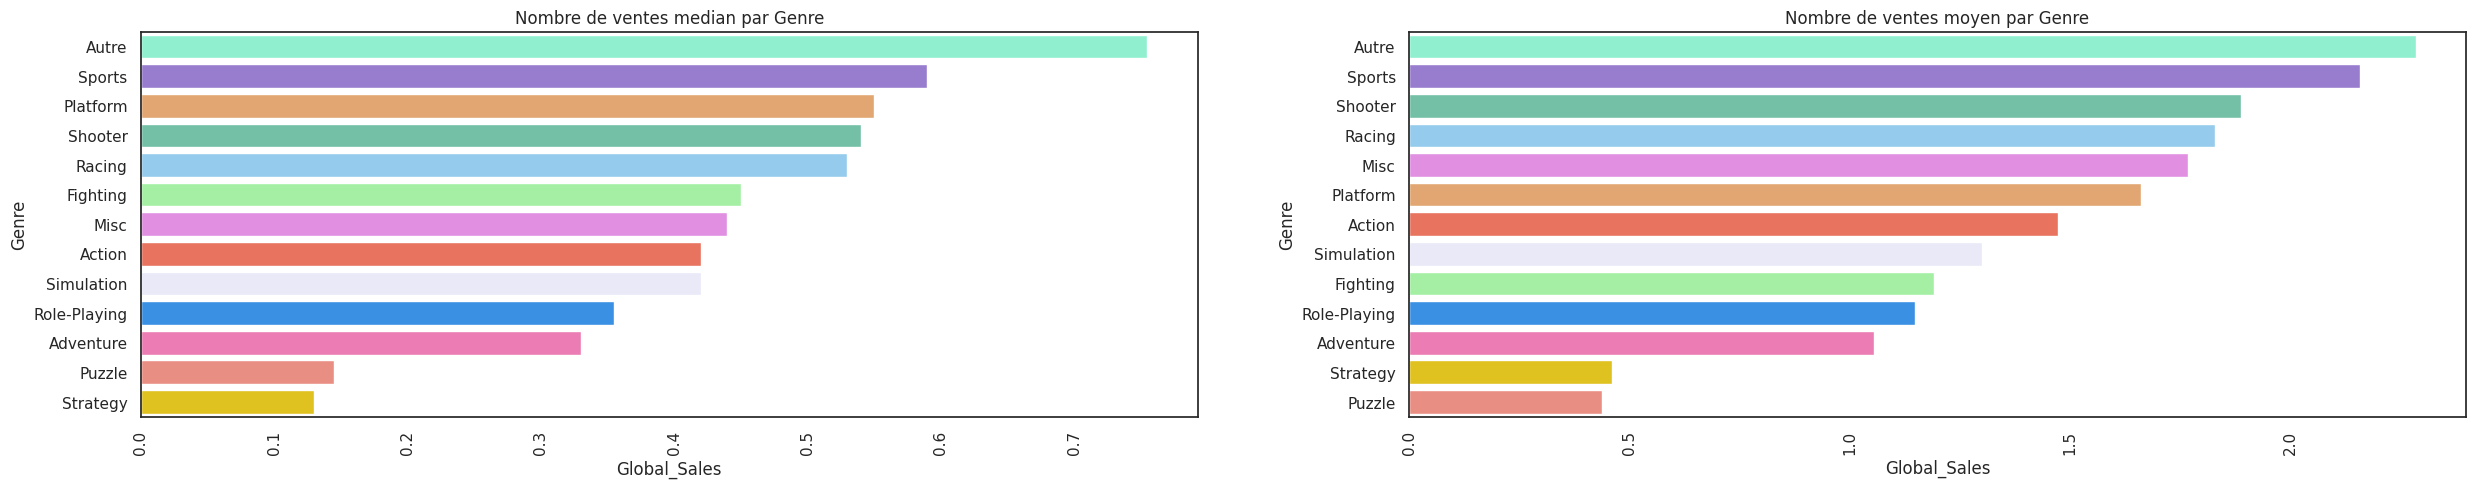

In [ ]:
sns.set_theme(style = 'white')

plt.figure(figsize=(30, 5))

plt.subplot(1, 2, 1)
df_publisher = df[['Genre', 'Global_Sales']]
df_publisher = df_publisher.groupby('Genre')['Global_Sales'].median().sort_values(ascending=False)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Genre", x="Global_Sales",palette =DICT_GENRE,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Nombre de ventes median par Genre")

plt.subplot(1, 2, 2)
df_publisher = df[['Genre', 'Global_Sales']]
df_publisher = df_publisher.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Genre", x="Global_Sales",palette =DICT_GENRE,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Nombre de ventes moyen par Genre")

[Text(0, 0, 'Role-Playing'),
 Text(1, 0, 'Shooter'),
 Text(2, 0, 'Racing'),
 Text(3, 0, 'Autre'),
 Text(4, 0, 'Misc'),
 Text(5, 0, 'Sports'),
 Text(6, 0, 'Simulation'),
 Text(7, 0, 'Action'),
 Text(8, 0, 'Puzzle'),
 Text(9, 0, 'Platform'),
 Text(10, 0, 'Adventure'),
 Text(11, 0, 'Strategy'),
 Text(12, 0, 'Fighting')]

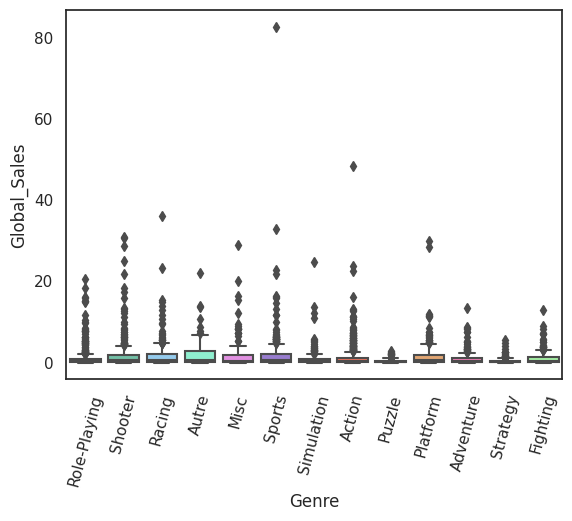

In [ ]:
import seaborn as sns
ax=sns.boxplot(x='Genre',
            y='Global_Sales',
            palette = DICT_GENRE,
            data=df[df.Genre.isin(list(df.Genre.value_counts().index))])
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)

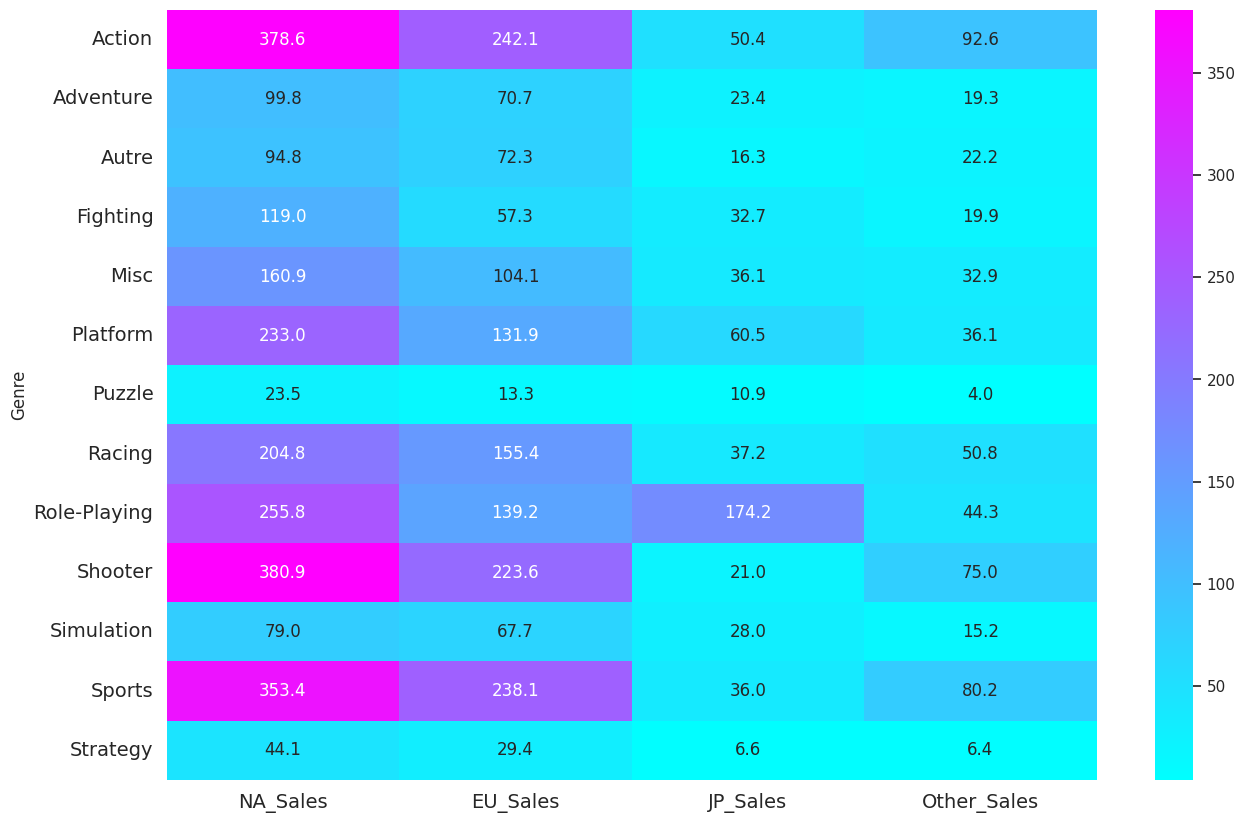

In [ ]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True,cmap="cool", fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [ ]:
from bokeh.layouts import row
from bokeh.models import Range1d, LabelSet
from bokeh.plotting import figure, output_notebook, show
from bokeh.models.widgets import Panel
from bokeh.models.widgets import Tabs
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.palettes import inferno

liste=['Misc','Action','Shooter','Adventure','Sports']
color=['violet','tomato','mediumaquamarine','hotpink','mediumpurple']

df_bokeh = df.Year>1992

p = figure(plot_width = 1000, plot_height = 600,x_axis_label='Year', y_axis_label='Genre')
for index, i in enumerate(liste):
    dfsource =pd.DataFrame(df[df.Genre ==i].groupby(['Genre', 'Year']).count()).reset_index()
    source = ColumnDataSource(dfsource)
    p.line(x = "Year",
        y = "Name",
        line_width = 3,
        color=color[index],
        source = source,
        legend_label=i)

p.legend.click_policy="mute"
show(p)

In [ ]:
from bokeh.layouts import row
from bokeh.models import Range1d, LabelSet
from bokeh.plotting import figure, output_notebook, show
from bokeh.models.widgets import Panel
from bokeh.models.widgets import Tabs
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
output_notebook()


source = ColumnDataSource(df)
hover = HoverTool(
       tooltips=[
           ("name", "@Name"),
           ("Genre", "@Genre"),
           ("Platform", "@Platform"),
           ("Studio", "@Studio"),
           ("Note", '@Critic_Score') ])

p = figure(plot_width=800, plot_height=700,x_axis_label='Year', y_axis_label='Global_Sales')
p.circle(x='Year',y='Global_Sales',source = source,color='darkviolet',size=10)
p.add_tools(hover)

show(p)

Top 10 Publisher

In [ ]:
# création du dico
DICT_PUBLISHER = {'Nintendo' : 'dodgerblue','Sony Computer Entertainment':'tomato','Ubisoft':'mediumaquamarine','Electronic Arts':'mediumpurple',
                'Sega':'sandybrown','Konami':'lightskyblue','Activision':'hotpink','THQ':'palegreen','Capcom':'violet','Atlus':'gold',"Rockstar Games":'lavender',
                'Mojang':'salmon','RedOctane':'aquamarine','EA Sports' : 'darkseagreen','Microsoft Game Studios':'moccasin','Sony Computer Entertainment America':'rosybrown','Broderbund':'blue',
                'MTV Games':'plum','ASC Games':"turquoise",'Valve':'indianred','Hello Games':'peachpuff','Microsoft Studios':'lemonchiffon','Valve Corporation':'lightcoral',
                'Bethesda Softworks':'paleturquoise','LucasArts':'steelblue','Virgin Interactive':'chocolate','Sony Interactive Entertainment':'mediumorchid',
                'Blizzard Entertainment':'yellowgreen','City Interactive':'slategrey','Rare':'cornsilk','Square':'cadetblue','Warner Bros. Interactive':'pink'}

Text(0.5, 1.0, 'Nombre de ventes median par Publisher')

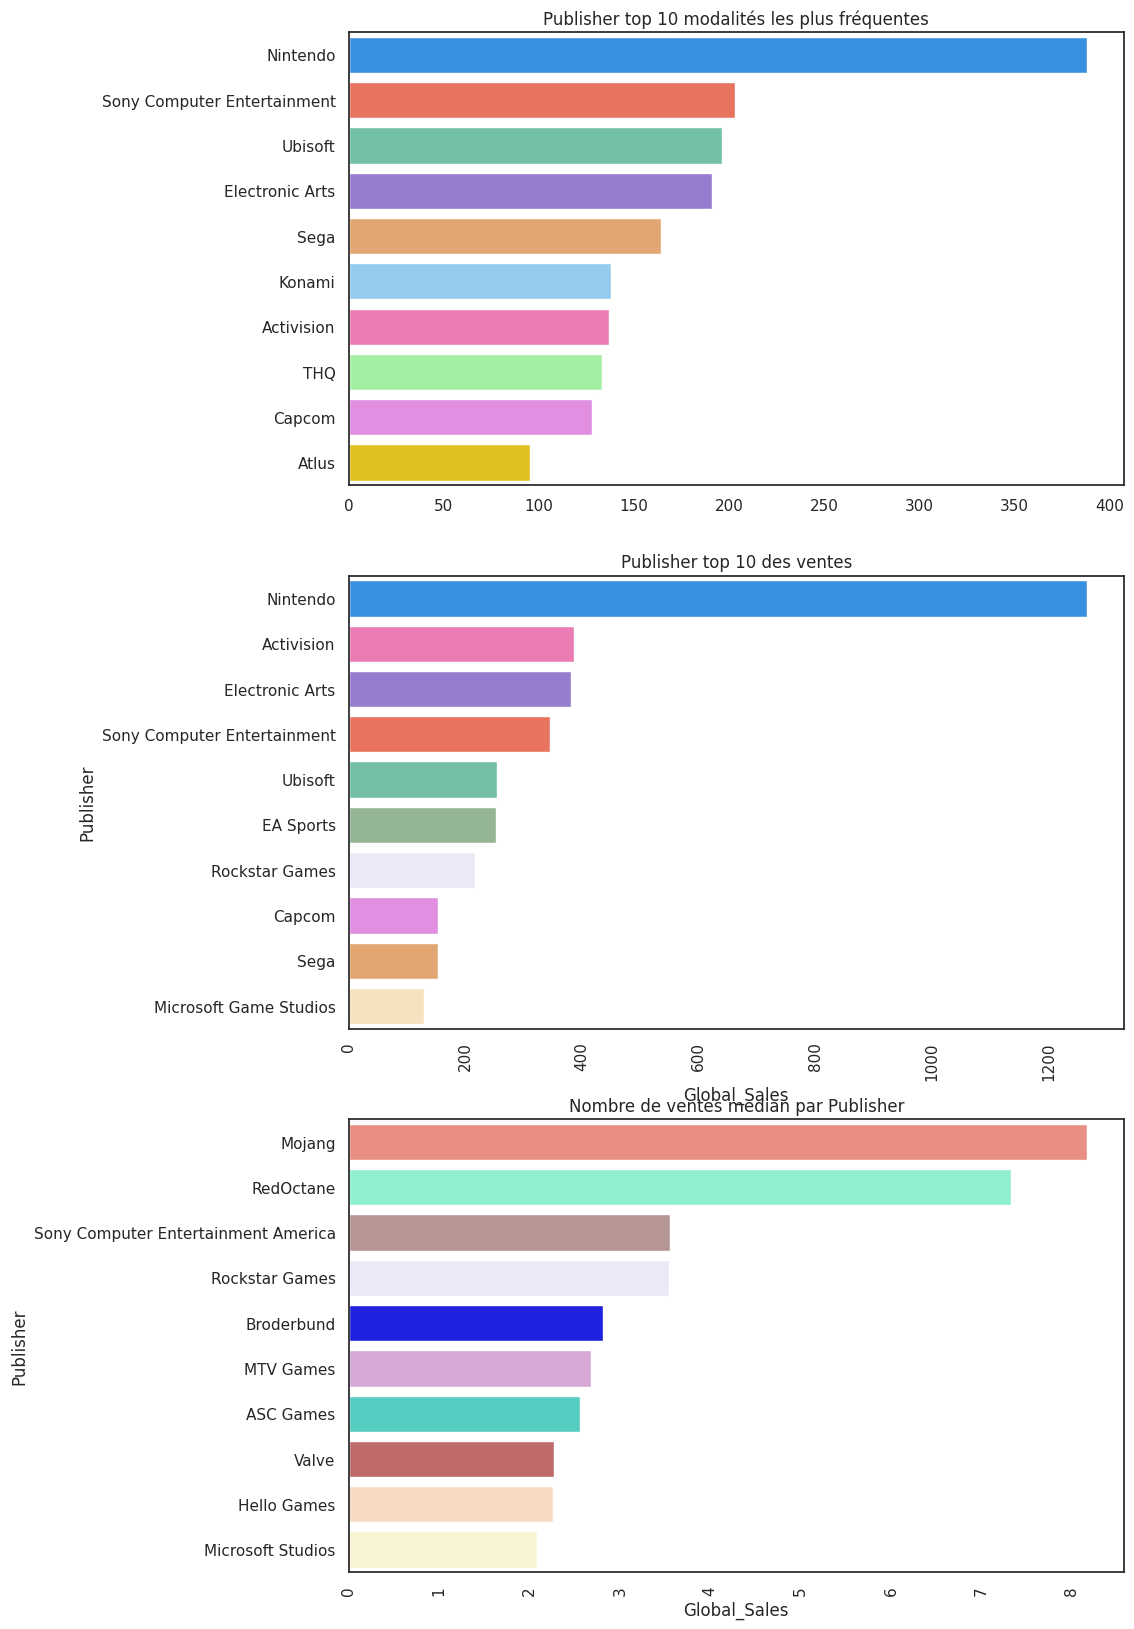

In [ ]:
sns.set_theme(style = 'white')
plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
sns.barplot(y=df["Publisher"].value_counts().head(10).index,
           x=df["Publisher"].value_counts().head(10).values, palette = DICT_PUBLISHER );
plt.title("Publisher top 10 modalités les plus fréquentes")

plt.subplot(3, 1, 2)
df_publisher = df[['Publisher', 'Global_Sales']]
df_publisher = df_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Publisher", x="Global_Sales",palette = DICT_PUBLISHER,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Publisher top 10 des ventes")

plt.subplot(3, 1, 3)
df_publisher = df[['Publisher', 'Global_Sales']]
df_publisher = df_publisher.groupby('Publisher')['Global_Sales'].median().sort_values(ascending=False).head(10)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Publisher", x="Global_Sales",palette = DICT_PUBLISHER,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Nombre de ventes median par Publisher")

Comparatif Publisher médiane vs moyenne

Text(0.5, 1.0, 'Nombre de ventes moyen par Publisher')

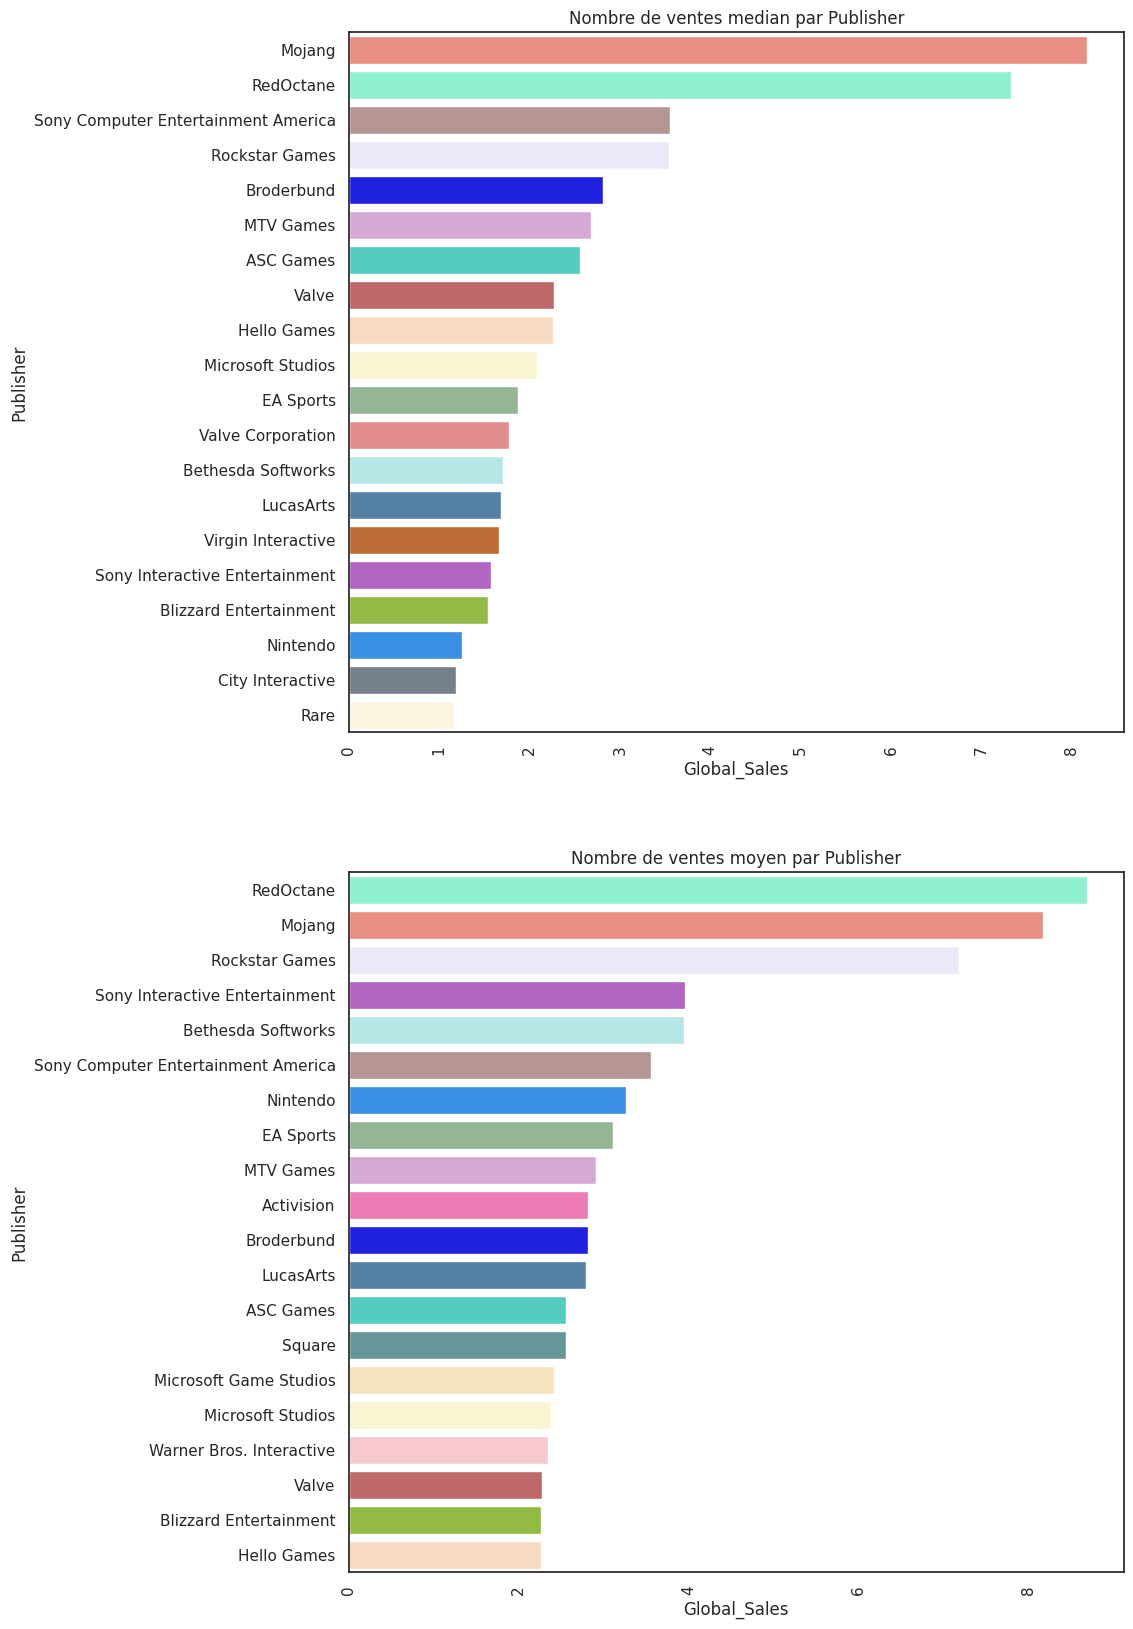

In [ ]:
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
df_publisher = df[['Publisher', 'Global_Sales']]
df_publisher = df_publisher.groupby('Publisher')['Global_Sales'].median().sort_values(ascending=False).head(20)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Publisher", x="Global_Sales",palette = DICT_PUBLISHER,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Nombre de ventes median par Publisher")

plt.subplot(2, 1, 2)
df_publisher = df[['Publisher', 'Global_Sales']]
df_publisher = df_publisher.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(20)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="Publisher", x="Global_Sales",palette = DICT_PUBLISHER,data=df_publisher)
plt.xticks(rotation=90);
plt.title("Nombre de ventes moyen par Publisher")

[Text(0, 0, 'Nintendo'),
 Text(1, 0, 'Sony Interactive Entertainment'),
 Text(2, 0, 'Rockstar Games'),
 Text(3, 0, 'Bethesda Softworks'),
 Text(4, 0, 'RedOctane'),
 Text(5, 0, 'Mojang')]

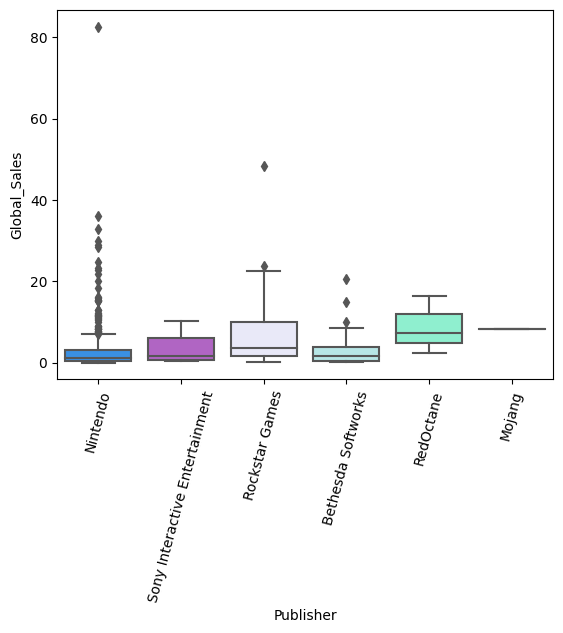

In [ ]:
ax=sns.boxplot(x='Publisher',
            y='Global_Sales',
            palette = DICT_PUBLISHER,
            data=df5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)

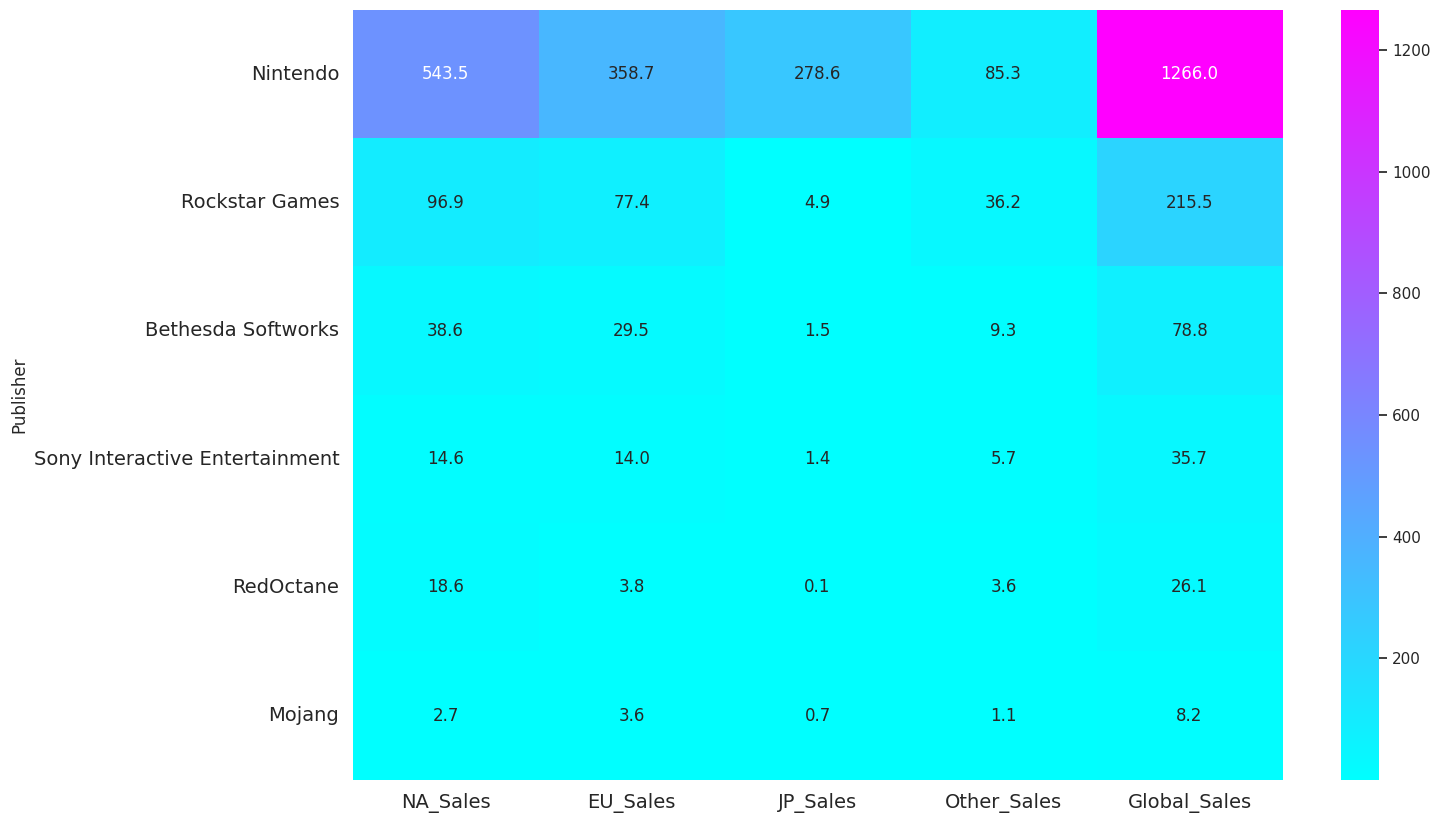

In [ ]:
comp_platform = df5[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', "Global_Sales"]]
# comp_genre
comp_map = comp_platform.groupby(by=['Publisher']).sum().sort_values(by = "Global_Sales", ascending=False).head(10)
# comp_map

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True,cmap="cool", fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Top Studio

In [ ]:
DICT_STUDIO = {'Capcom': 'dodgerblue',
 'Konami': 'tomato',
 'Nintendo EAD': 'mediumaquamarine',
 'EA Canada': 'mediumpurple',
 'Square Enix': 'sandybrown',
 'Ubisoft Montreal': 'lightskyblue',
 'EA Tiburon': 'hotpink',
 'Namco': 'palegreen',
 'Ubisoft ': 'violet',
 'Sonic Team': 'gold',
 'Hudson Soft': 'lavender',
 'Rare Ltd.': 'salmon',
 'Atlus Co.': 'aquamarine',
    'Ubisoft': "orchid",
              'Game Freak': "plum",
              'Rockstar North': "lavender",
              'Infinity Ward':"magenta",
              "Traveller's Tales":"blue",
               'Treyarch':"mediumpurple",
               'Good Science Studio':"turquoise",
               'Nintendo SDD': "slateblue",
               'Sledgehammer Games': "lightcoral",
               'Dice': "peachpuff",
               'Neversoft': "lemonchiffon",
               'Nintendo EAD / Retro Studios': "mintcream",
               'Rockstar Games': "powderblue",
               'EA DICE': "navy",
               'Bethesda Game Studios':"palegreen",
               'Polyphony Digital': "blueviolet",
               '4J Studios': "bisque",
               'Nintendo EAD Tokyo':"azure",
               'Bungie Studios': "steeblue",
               'Project Sora':"chocolate",
               'Naughty Dog': "mediumorchid",
               'Team Bondi': "lightcyan",
               'Level 5 / Armor Project': "tomato",
               "Bungie":"deeppink"
}

Text(0.5, 1.0, 'Nombre de ventes median par Studio')

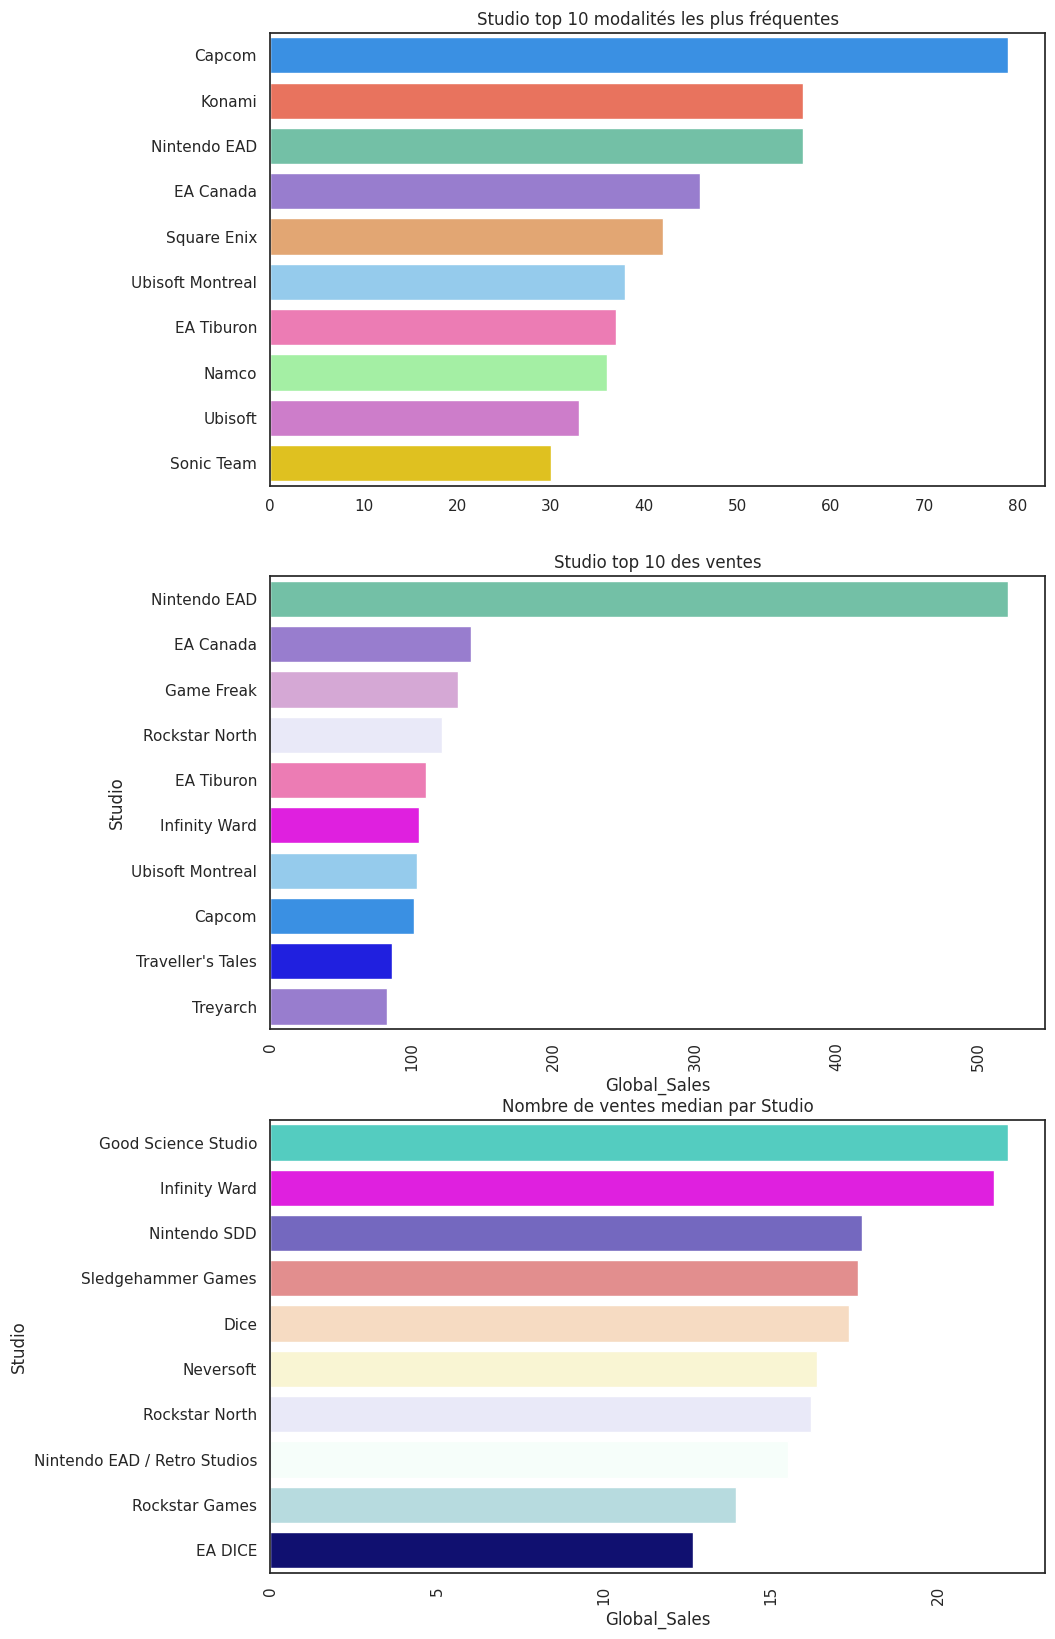

In [ ]:
sns.set_theme(style = 'white')
plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 1)
sns.barplot(y=df["Studio"].value_counts().head(10).index,
           x=df["Studio"].value_counts().head(10).values, palette = DICT_STUDIO );
plt.title("Studio top 10 modalités les plus fréquentes")
plt.subplot(3, 1, 2)
df_studio = df[['Studio', 'Global_Sales']]
df_studio = df_studio.groupby('Studio')['Global_Sales'].sum().sort_values(ascending=False).head(10)
df_studio = pd.DataFrame(df_studio).reset_index()
sns.barplot(y="Studio", x="Global_Sales",palette = DICT_STUDIO,data=df_studio)
plt.xticks(rotation=90);
plt.title("Studio top 10 des ventes")
plt.subplot(3, 1, 3)
df_studio = df[['Studio', 'Global_Sales']]
df_studio = df_studio.groupby('Studio')['Global_Sales'].median().sort_values(ascending=False).head(10)
df_studio = pd.DataFrame(df_studio).reset_index()
sns.barplot(y="Studio", x="Global_Sales",palette = DICT_STUDIO,data=df_studio)
plt.xticks(rotation=90);
plt.title("Nombre de ventes median par Studio")

Text(0.5, 1.0, 'Nombre de ventes moyen par Studio')

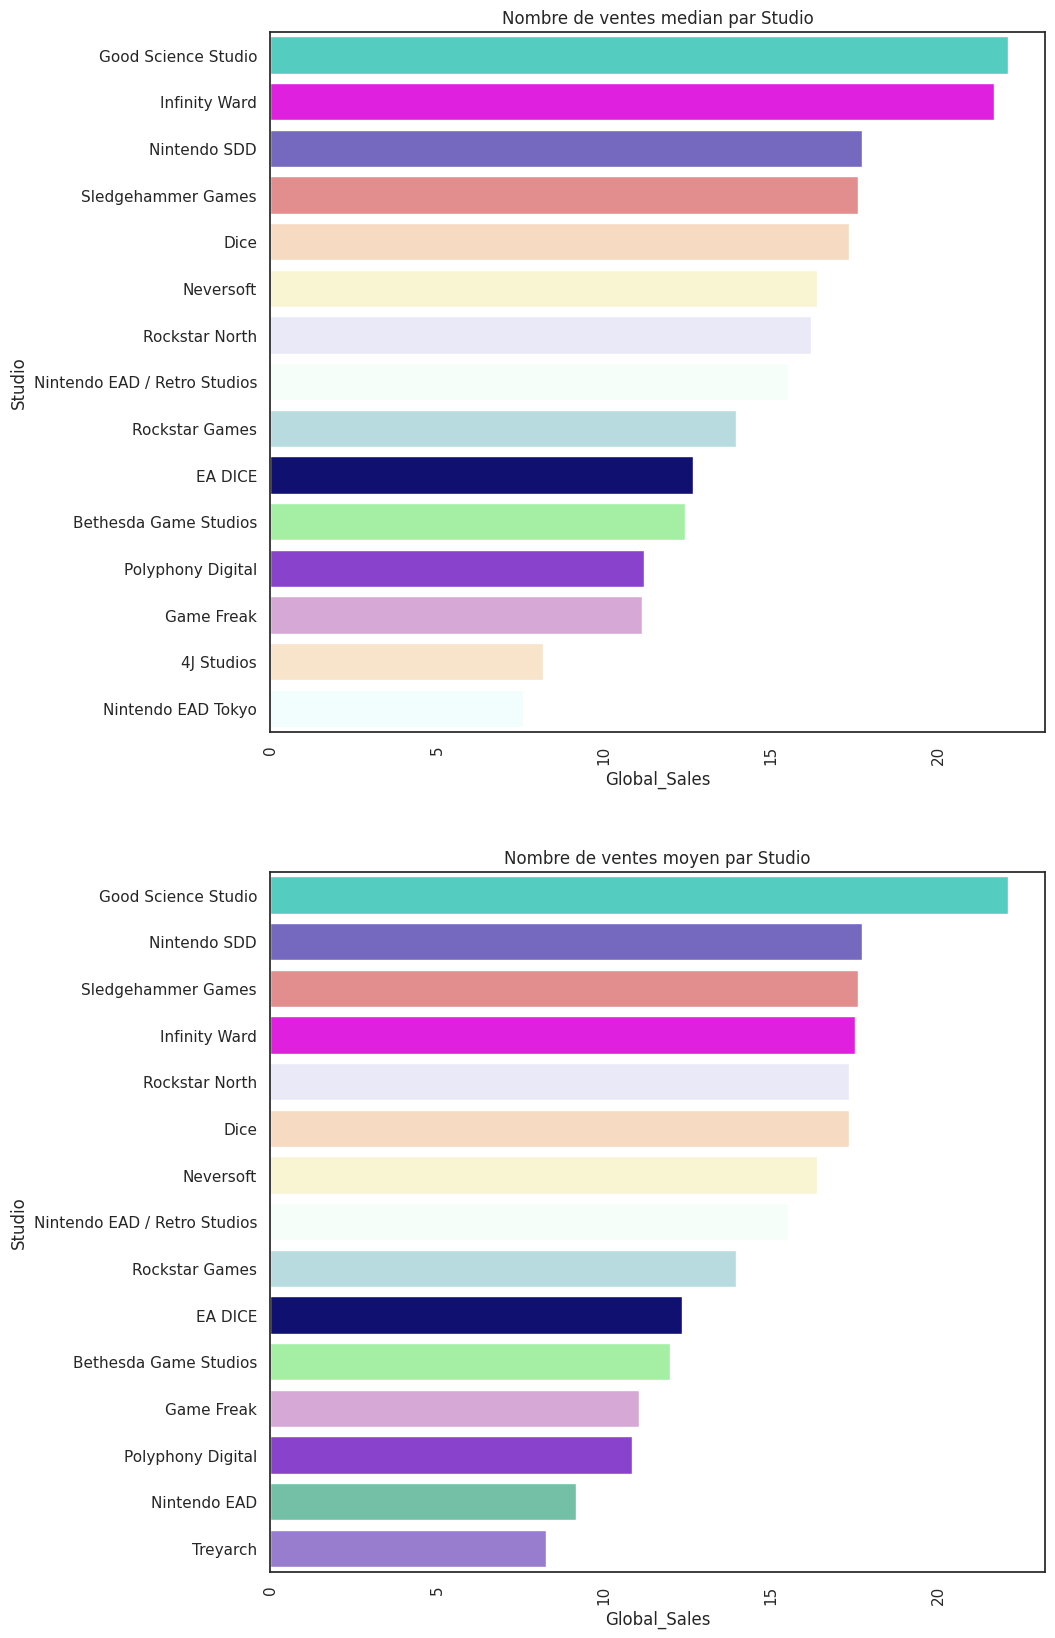

In [ ]:
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
df_studio = df[['Studio', 'Global_Sales']]
df_studio = df_studio.groupby('Studio')['Global_Sales'].median().sort_values(ascending=False).head(15)
df_studio = pd.DataFrame(df_studio).reset_index()
sns.barplot(y="Studio", x="Global_Sales",palette = DICT_STUDIO,data=df_studio)
plt.xticks(rotation=90);
plt.title("Nombre de ventes median par Studio")
plt.subplot(2, 1, 2)
df_studio = df[['Studio', 'Global_Sales']]
df_studio = df_studio.groupby('Studio')['Global_Sales'].mean().sort_values(ascending=False).head(15)
df_studio = pd.DataFrame(df_studio).reset_index()
sns.barplot(y="Studio", x="Global_Sales",palette = DICT_STUDIO, data=df_studio)
plt.xticks(rotation=90);
plt.title("Nombre de ventes moyen par Studio")

[Text(0, 0, 'Treyarch'),
 Text(1, 0, 'Nintendo EAD'),
 Text(2, 0, 'Nintendo SDD'),
 Text(3, 0, 'Infinity Ward'),
 Text(4, 0, 'Sledgehammer Games'),
 Text(5, 0, 'Nintendo EAD Tokyo'),
 Text(6, 0, 'Good Science Studio'),
 Text(7, 0, '4J Studios')]

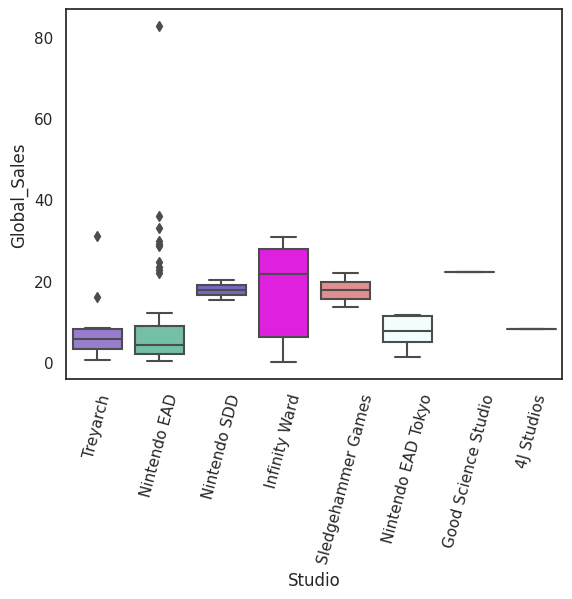

In [ ]:
sns.set_theme(style = 'white')
ax=sns.boxplot(x='Studio',
            y='Global_Sales',
               palette = DICT_STUDIO,
            data=df6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)

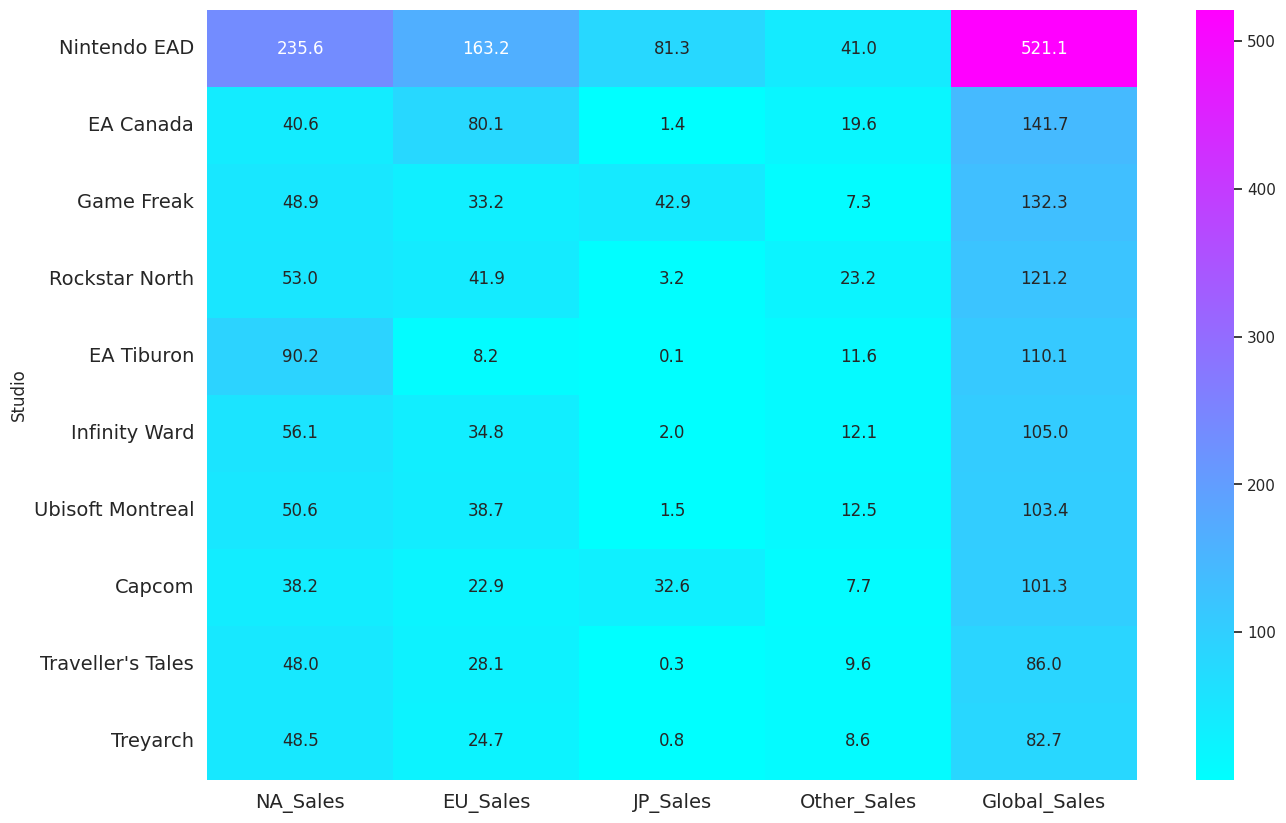

In [ ]:
comp_platform = df[['Studio', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', "Global_Sales"]]
# comp_genre
comp_map = comp_platform.groupby(by=['Studio']).sum().sort_values(by = "Global_Sales", ascending=False).head(10)
# comp_map

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True,cmap="cool", fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

**Analyse des notes**

In [ ]:
df['cat_Notes'] = pd.cut(df['Critic_Score'], bins = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['0 à 1','1 à 2','2 à 3','3 à 4','4 à 5','5 à 6','6 à 7', '7 à 8', '8 à 9', '9 à 10'])
# Remplacer les modalités peu nombreuse par Autre
df['cat_Notes'] = df['cat_Notes'].replace(['2 à 3', '1 à 2', '0 à 1'],['Autre','Autre','Autre'])
# Créer une serie pour analyser le genre
df3 = df['cat_Notes']
df3.str.split(',', expand=True).stack().reset_index(drop=True)

0       6 à 7
1       6 à 7
2       5 à 6
3       7 à 8
4       7 à 8
        ...  
3395    7 à 8
3396    7 à 8
3397    7 à 8
3398    8 à 9
3399    8 à 9
Length: 3400, dtype: object

In [ ]:
color = ['dodgerblue','tomato','mediumaquamarine','mediumpurple','sandybrown',
                                        'lightskyblue','hotpink','palegreen','violet','gold','lavender',
                                        'salmon','aquamarine','plum','peachpuff']
import plotly.express as px
fig = px.pie(df3,
             values=df3.value_counts(),
             names=df3.value_counts().index,
             color_discrete_sequence = color)
fig.show()

In [ ]:
# création d'un dictionnaire pour avoir les même couleurs
DICT_NOTE = {'7 à 8': 'dodgerblue',
 '8 à 9': 'tomato',
 '6 à 7': 'mediumaquamarine',
 '5 à 6': 'mediumpurple',
 '4 à 5': 'sandybrown',
 '9 à 10': 'lightskyblue',
 '3 à 4': 'hotpink',
 'Autre': 'palegreen'}

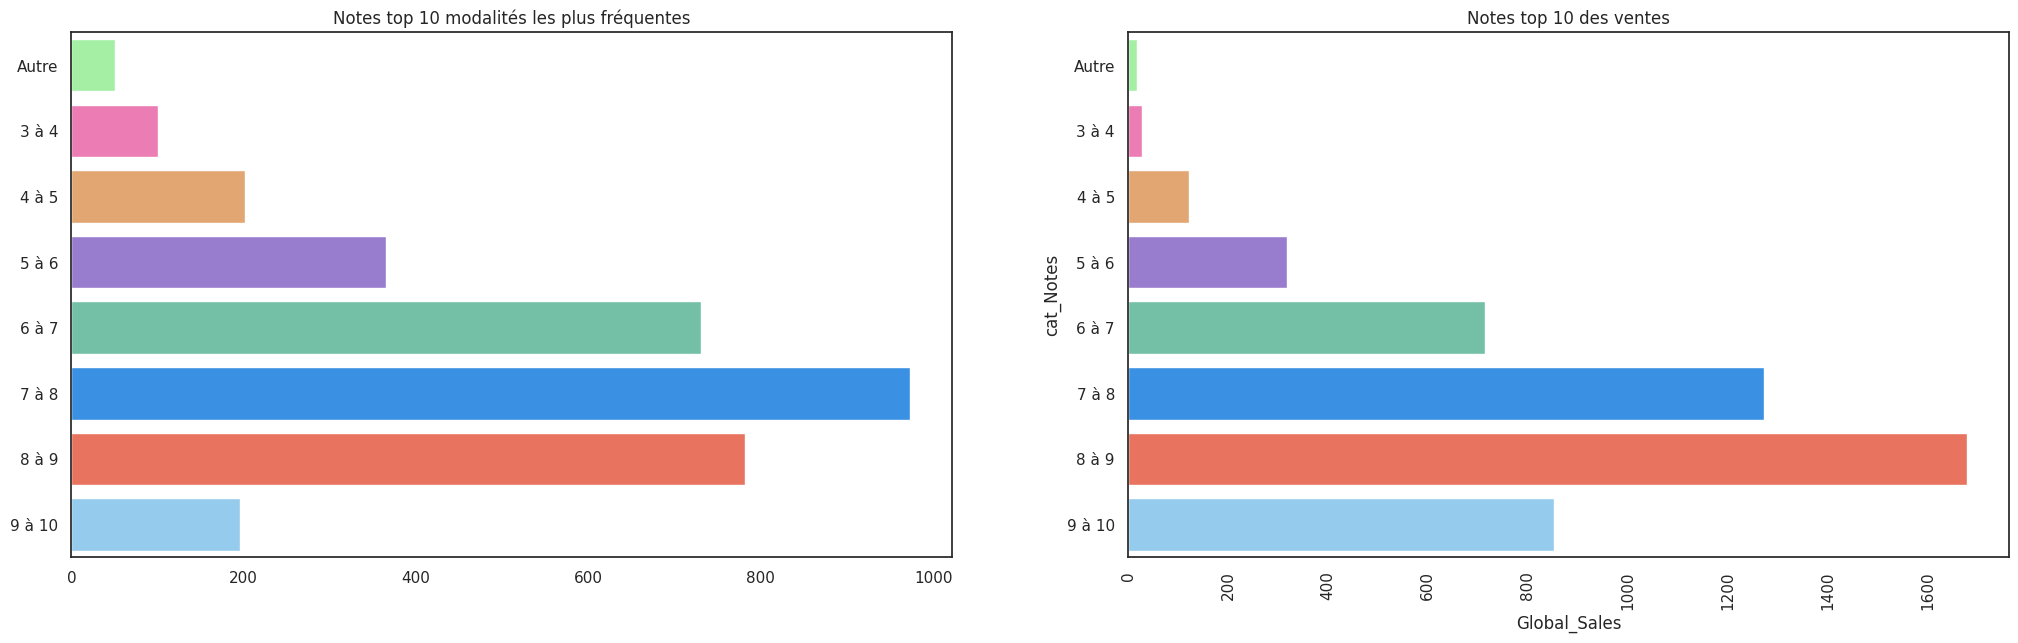

In [ ]:
sns.set_theme(style = 'white')
plt.subplot(2, 2, 1)
sns.barplot(y=df["cat_Notes"].value_counts().head(10).index,
           x=df["cat_Notes"].value_counts().head(10).values,
            palette = DICT_NOTE)
plt.title("Notes top 10 modalités les plus fréquentes")

plt.subplot(2, 2, 2)
df_publisher = df[['cat_Notes', 'Global_Sales']]
df_publisher = df_publisher.groupby('cat_Notes')['Global_Sales'].sum().sort_values(ascending=False).head(10)
df_publisher = pd.DataFrame(df_publisher).reset_index()
sns.barplot(y="cat_Notes", x="Global_Sales",data=df_publisher, palette = DICT_NOTE)
plt.xticks(rotation=90);
plt.title("Notes top 10 des ventes")

# Pour agrandir la figure
fig = plt.gcf() # gcf = "get current figure"
fig.set_size_inches(25,15) # définit la taille de la figure en pouces

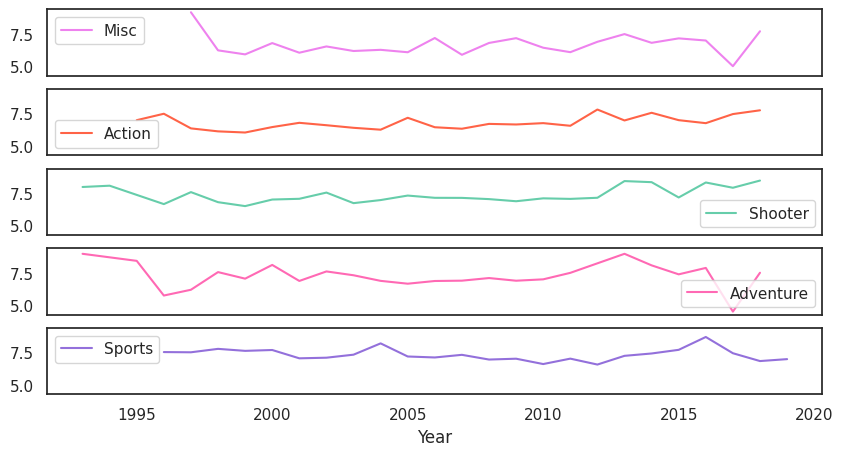

In [ ]:
figure, ax = plt.subplots(5, 1, sharex=True,sharey=True,
                            figsize=(10, 5))

liste=['Misc','Action','Shooter','Adventure','Sports']
color=['violet','tomato','mediumaquamarine','hotpink','mediumpurple']
for index, i in enumerate(liste):
    dfsource =pd.DataFrame(df[df.Genre ==i].groupby(['Genre', 'Year']).mean()).reset_index()
    source = ColumnDataSource(dfsource)
    sns.lineplot(x = "Year",
        y = "Critic_Score",
        data=dfsource,
        color=color[index],
        label=i,
                 ax=ax[index])
    ax[index].set_ylabel('')
plt.show();